In [103]:
from sklearn import *
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import altair as alt

In [ ]:
PATH='E:/kaggle/ieee-fraud-detection/'
tran_tr=pd.read_csv(PATH+'train_transaction.csv')
iden_tr=pd.read_csv(PATH+'train_identity.csv')
tran_ts=pd.read_csv(PATH+'test_transaction.csv')
iden_ts=pd.read_csv(PATH+'test_identity.csv')

In [ ]:
train=pd.merge(tran_tr,iden_tr,on='TransactionID',how='left')
test=pd.merge(tran_ts,iden_ts,on='TransactionID',how='left')
print(f'Train: {train.shape[0]} rows {train.shape[1]} columns.')
print(f'Test: {test.shape[0]} rows {test.shape[1]} columns.')

In [50]:
# check the missing values
data_na=(train.isnull().sum()/len(train))*100
missing_data=pd.DataFrame({'MissingRatio':data_na})

In [55]:
print((missing_data[0:50]))
print((missing_data[50:100]))
print((missing_data[100:150]))
print((missing_data[150:200]))
print((missing_data[200:250]))
print((missing_data[250:300]))
print((missing_data[300:350]))
print((missing_data[350:400]))
print((missing_data[400:434]))

                MissingRatio
TransactionID       0.000000
isFraud             0.000000
TransactionDT       0.000000
TransactionAmt      0.000000
ProductCD           0.000000
card1               0.000000
card2               1.512683
card3               0.265012
card4               0.267044
card5               0.721204
card6               0.266028
addr1              11.126427
addr2              11.126427
dist1              59.652352
dist2              93.628374
P_emaildomain      15.994852
R_emaildomain      76.751617
C1                  0.000000
C2                  0.000000
C3                  0.000000
C4                  0.000000
C5                  0.000000
C6                  0.000000
C7                  0.000000
C8                  0.000000
C9                  0.000000
C10                 0.000000
C11                 0.000000
C12                 0.000000
C13                 0.000000
C14                 0.000000
D1                  0.214888
D2                 47.549192
D3            

In [5]:
# target value
train.isFraud.value_counts()

0    569877
1     20663
Name: isFraud, dtype: int64

In [6]:
'''
# Just for data checking
for col in train.columns:
    def check(mit):
        print(mit.value_counts())
        print(mit.isnull().value_counts())
    check(test.TransactionAmt)
'''

'\n# Just for data checking\nfor col in train.columns:\n    def check(mit):\n        print(mit.value_counts())\n        print(mit.isnull().value_counts())\n    check(test.TransactionAmt)\n'

In [7]:
'''
TransactionDT：连续数值型
TransactionAmt：连续数值型
ProductCD：类别变量，5个类
card1/2/3/5：奇怪的整数特征
card4/6：类别变量，4个类（极其不平衡）
addr1/2：奇怪的整数特征
dist1/2：奇怪的整数特征（不平衡，缺失较多）
P_emaildomain：类别变量
R_emaildomain：类别变量（缺失较多）
C1-14：都是奇怪的整数特征，有的很不平衡，但是没有缺失
D1-15：都是奇怪的整数特征，有的很不平衡，有的缺失很多
M1-9：类别特征，TF或很少的类，有的很不平衡，基本上缺失一半
V1-339：整数特征，有的很不平衡，有的缺失很多
id_01-38：各种类型的特征都有
Device Type/Info：类别特征
'''

'\nTransactionDT：连续数值型\nTransactionAmt：连续数值型\nProductCD：类别变量，5个类\ncard1/2/3/5：奇怪的整数特征\ncard4/6：类别变量，4个类（极其不平衡）\naddr1/2：奇怪的整数特征\ndist1/2：奇怪的整数特征（不平衡，缺失较多）\nP_emaildomain：类别变量\nR_emaildomain：类别变量（缺失较多）\nC1-14：都是奇怪的整数特征，有的很不平衡，但是没有缺失\nD1-15：都是奇怪的整数特征，有的很不平衡，有的缺失很多\nM1-9：类别特征，TF或很少的类，有的很不平衡，基本上缺失一半\nV1-339：整数特征，有的很不平衡，有的缺失很多\nid_01-38：各种类型的特征都有\nDevice Type/Info：类别特征\n'

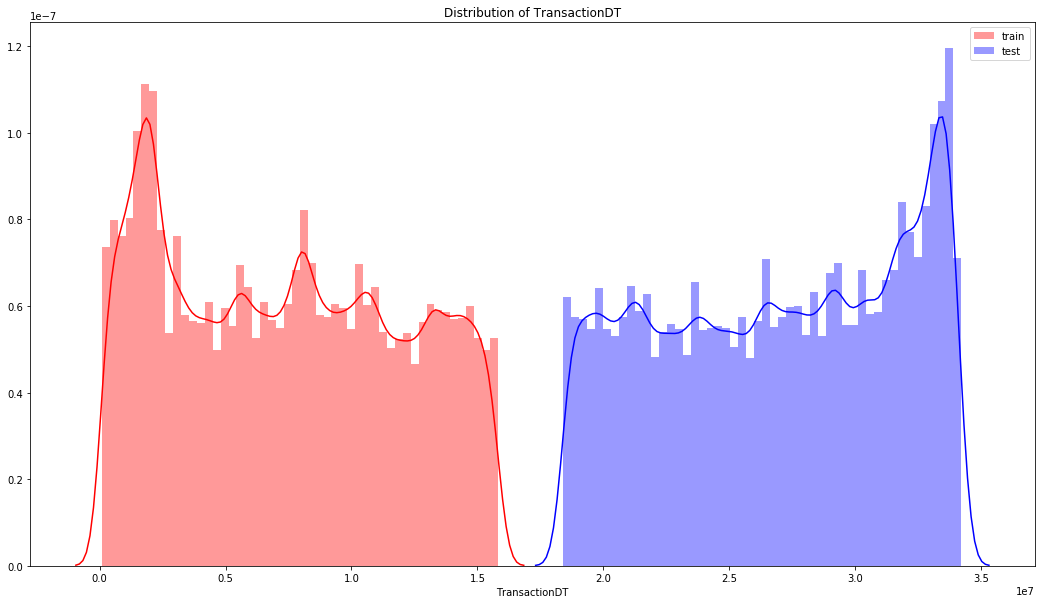

In [9]:
# data visualization
# TransactionDT
plt.figure(figsize=(18,10))
plt.title('Distribution of TransactionDT')
sns.distplot(train.TransactionDT,color='red',kde=True,label='train')
sns.distplot(test.TransactionDT,color='blue',kde=True,label='test')
plt.legend()
plt.show()
# 30 Days gap between train and test

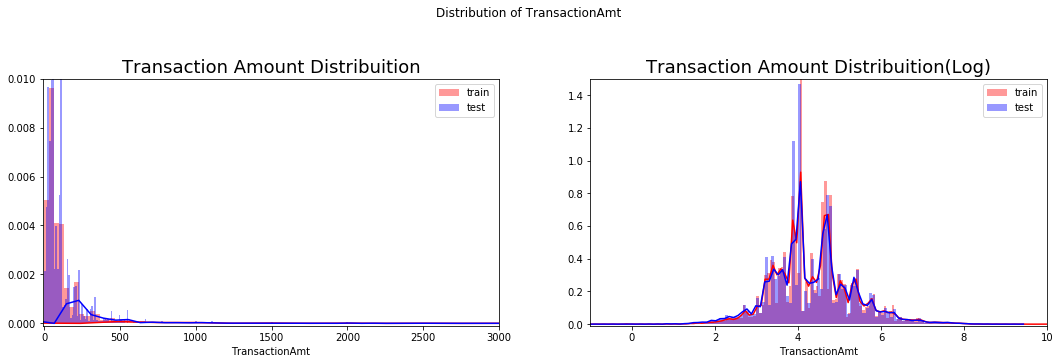

In [10]:
# TransactionAmt & log-TransactionAmt
plt.figure(figsize=(18,10))
plt.suptitle('Distribution of TransactionAmt')
plt.subplot(221)
g1=sns.distplot(train.TransactionAmt,color='red',kde=True,bins=960,label='train')
g1=sns.distplot(test.TransactionAmt,color='blue',kde=True,bins=960,label='test')
g1.set_title("Transaction Amount Distribuition", fontsize=18)
plt.axis([-10,3000,-0.0001,0.01])
plt.legend()

plt.subplot(222)
g2=sns.distplot(np.log(train.TransactionAmt),color='red',kde=True,bins=180,label='train')
g2=sns.distplot(np.log(test.TransactionAmt),color='blue',kde=True,bins=180,label='test')
g2.set_title("Transaction Amount Distribuition(Log)", fontsize=18)
plt.axis([-1,10,-0.01,1.5])
plt.legend()
plt.show()

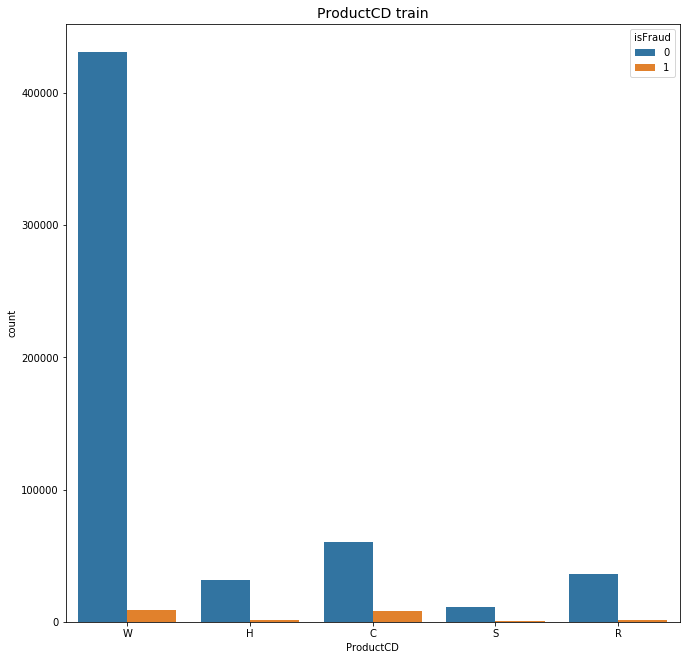

In [14]:
# product CD
fig,ax=plt.subplots(1,1,figsize=(11,11))
sns.countplot(x="ProductCD", ax=ax, hue = "isFraud", data=train)
ax.set_title('ProductCD train', fontsize=14)
plt.show()

Text(0.5, 1.0, 'card6 isFraud=1')

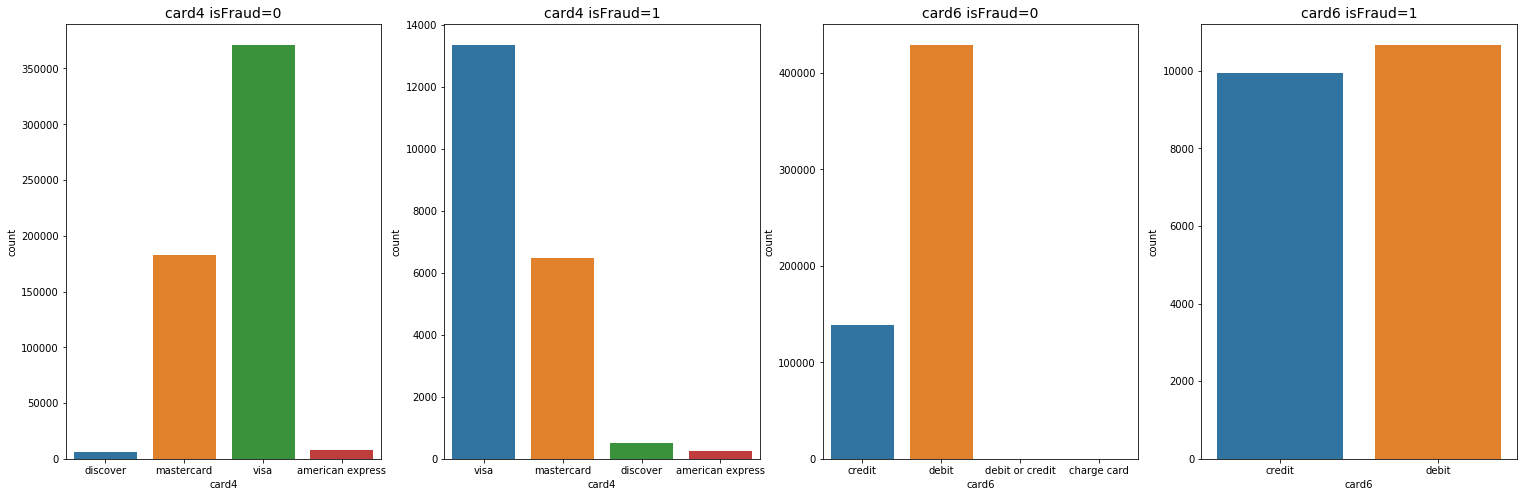

In [38]:
# cards 4 & 6
fig,ax=plt.subplots(1,4,figsize=(26,8))
sns.countplot(x="card4",ax=ax[0],data=train.loc[train['isFraud']==0])
ax[0].set_title("card4 isFraud=0",fontsize=14)
sns.countplot(x="card4",ax=ax[1],data=train.loc[train['isFraud']==1])
ax[1].set_title("card4 isFraud=1",fontsize=14)
sns.countplot(x="card6",ax=ax[2],data=train.loc[train['isFraud']==0])
ax[2].set_title("card6 isFraud=0",fontsize=14)
sns.countplot(x="card6",ax=ax[3],data=train.loc[train['isFraud']==1])
ax[3].set_title("card6 isFraud=1",fontsize=14)

Text(0.5, 1.0, 'card5')

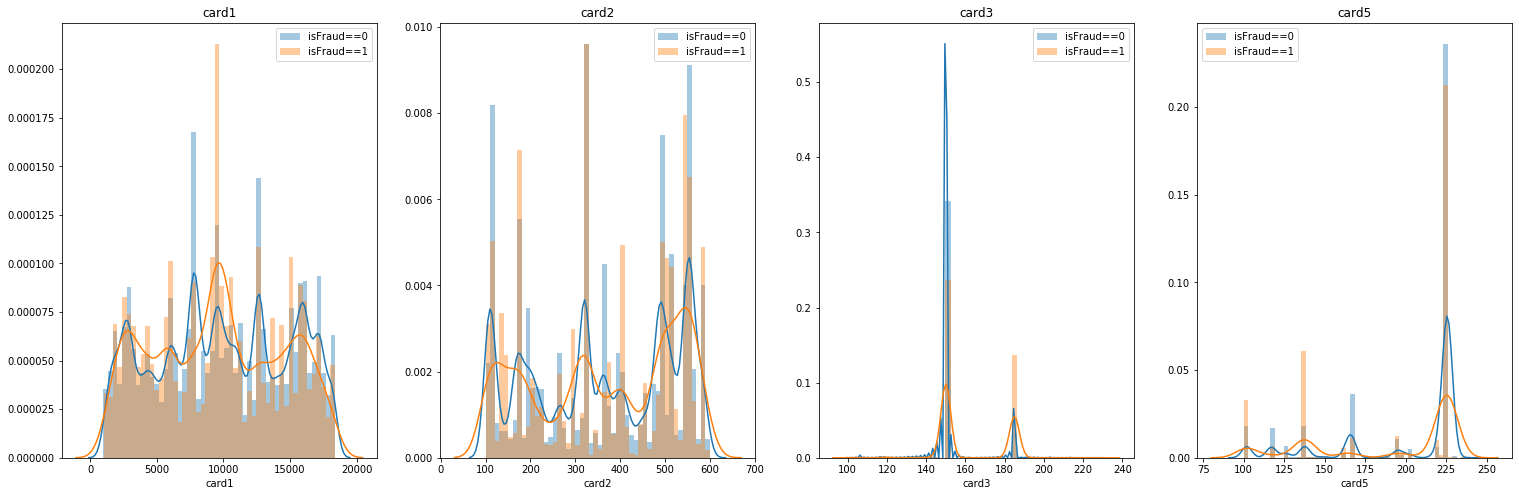

In [68]:
# card 1,2,3,5
fig,ax=plt.subplots(1,4,figsize=(26,8))
sns.distplot(train.loc[train['isFraud']==0]['card1'],bins=50,ax=ax[0],label='isFraud==0')
sns.distplot(train.loc[train['isFraud']==1]['card1'],bins=50,ax=ax[0],label='isFraud==1')
ax[0].legend()
ax[0].set_title("card1")
sns.distplot(train.loc[train['isFraud']==0]['card2'],bins=50,ax=ax[1],label='isFraud==0')
sns.distplot(train.loc[train['isFraud']==1]['card2'],bins=50,ax=ax[1],label='isFraud==1')
ax[1].legend()
ax[1].set_title("card2")
sns.distplot(train.loc[train['isFraud']==0]['card3'],bins=50,ax=ax[2],label='isFraud==0')
sns.distplot(train.loc[train['isFraud']==1]['card3'],bins=50,ax=ax[2],label='isFraud==1')
ax[2].legend()
ax[2].set_title("card3")
sns.distplot(train.loc[train['isFraud']==0]['card5'],bins=50,ax=ax[3],label='isFraud==0')
sns.distplot(train.loc[train['isFraud']==1]['card5'],bins=50,ax=ax[3],label='isFraud==1')
ax[3].legend()
ax[3].set_title("card5")


Text(0.5, 1.0, 'addr2')

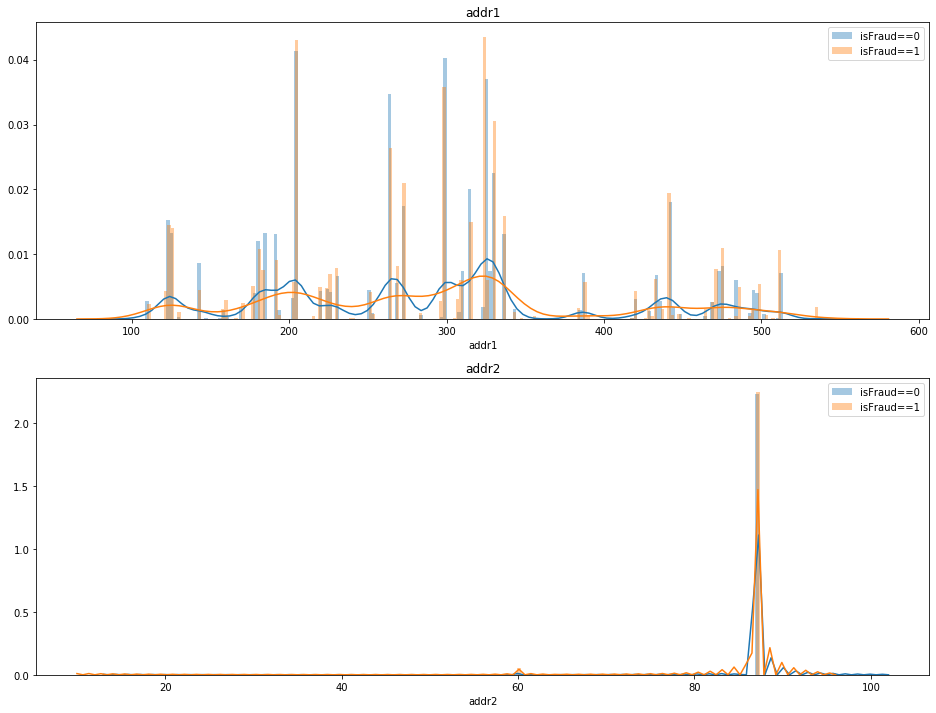

In [74]:
# addr1/2
fig,ax=plt.subplots(2,1,figsize=(16,12))
sns.distplot(train.loc[train['isFraud']==0]['addr1'],ax=ax[0],bins=200,label='isFraud==0')
sns.distplot(train.loc[train['isFraud']==1]['addr1'],ax=ax[0],bins=200,label='isFraud==1')
ax[0].legend()
ax[0].set_title('addr1')
sns.distplot(train.loc[train['isFraud']==0]['addr2'],ax=ax[1],bins=200,label='isFraud==0')
sns.distplot(train.loc[train['isFraud']==1]['addr2'],ax=ax[1],bins=200,label='isFraud==1')
ax[1].legend()
ax[1].set_title('addr2')

Text(0.5, 1.0, 'dist2')

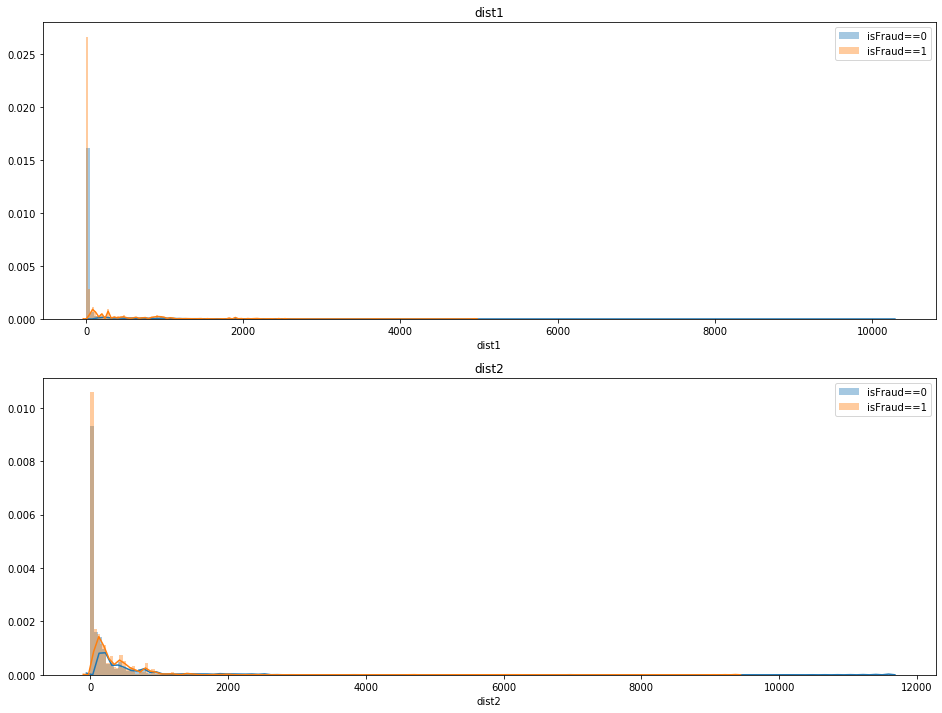

In [75]:
# dist1/2
fig,ax=plt.subplots(2,1,figsize=(16,12))
sns.distplot(train.loc[train['isFraud']==0]['dist1'],ax=ax[0],bins=200,label='isFraud==0')
sns.distplot(train.loc[train['isFraud']==1]['dist1'],ax=ax[0],bins=200,label='isFraud==1')
ax[0].legend()
ax[0].set_title('dist1')
sns.distplot(train.loc[train['isFraud']==0]['dist2'],ax=ax[1],bins=200,label='isFraud==0')
sns.distplot(train.loc[train['isFraud']==1]['dist2'],ax=ax[1],bins=200,label='isFraud==1')
ax[1].legend()
ax[1].set_title('dist2')

Text(0.5, 1.0, 'R_emaildomain isFraud==0')

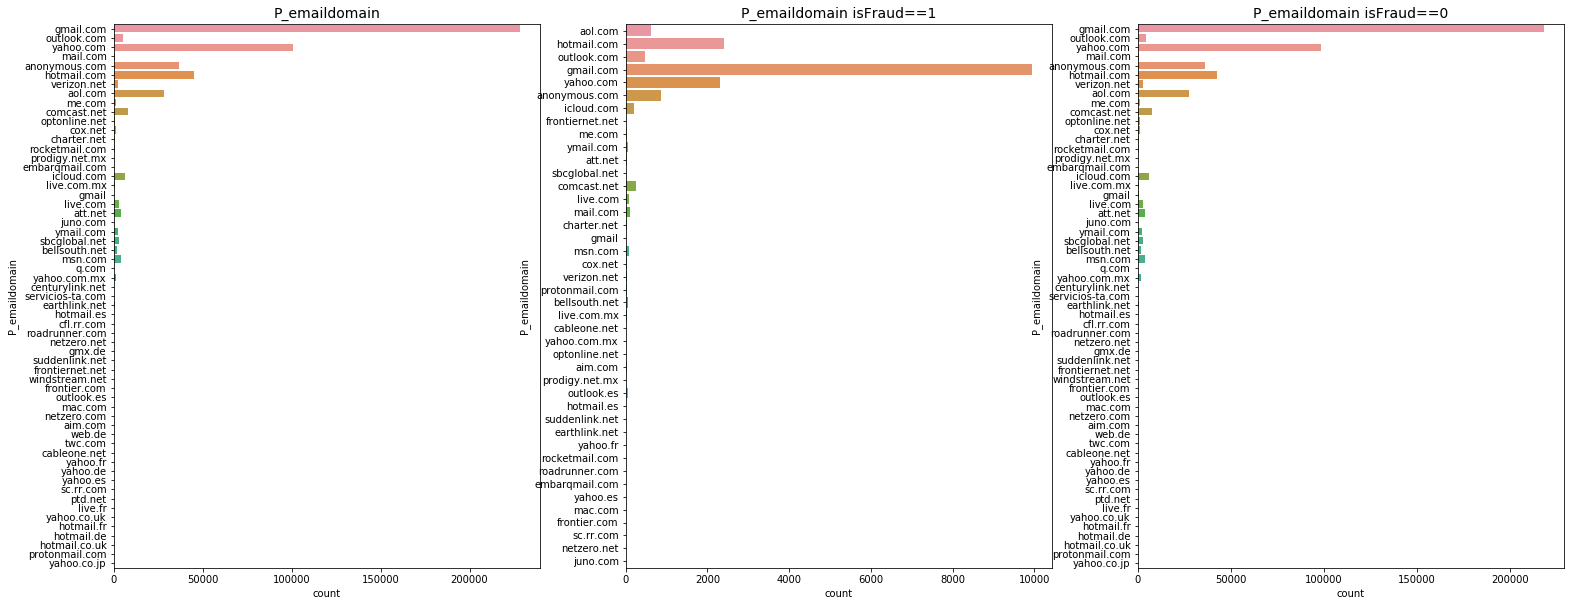

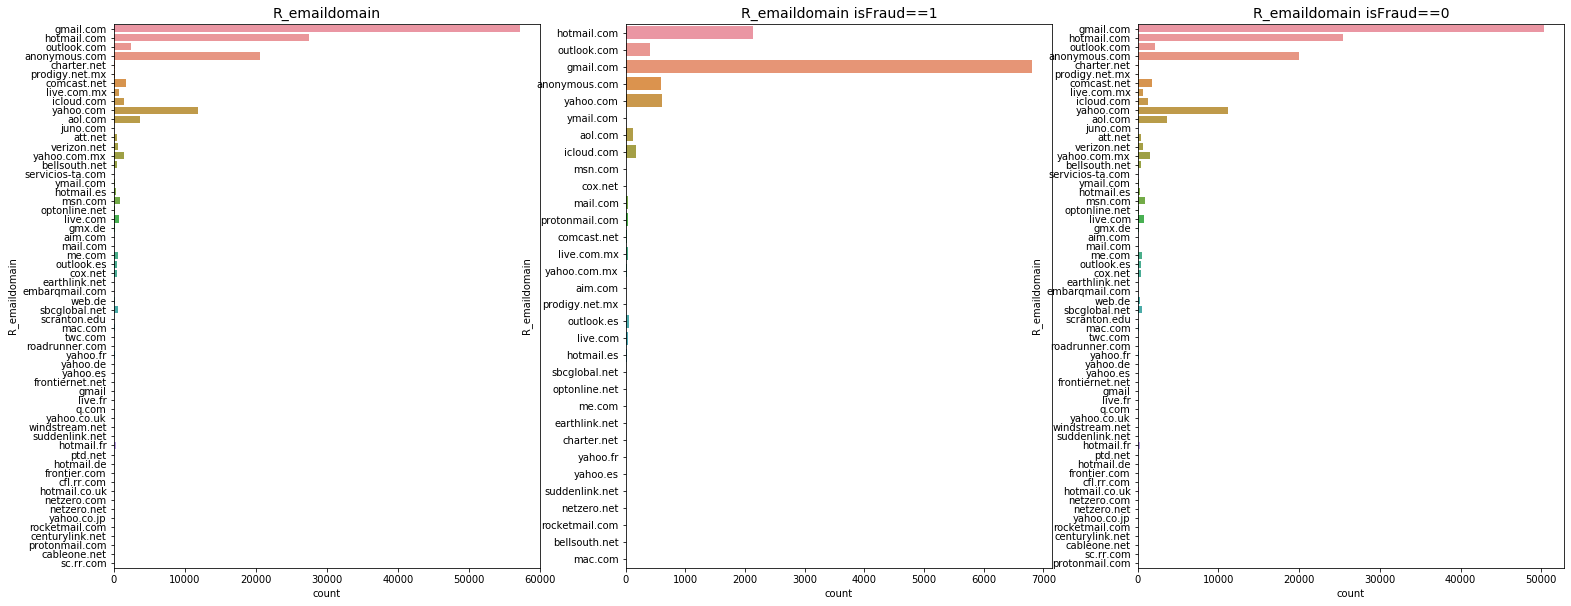

In [42]:
# email
fig,ax=plt.subplots(1,3,figsize=(26,10))
sns.countplot(y="P_emaildomain",ax=ax[0],data=train)
ax[0].set_title("P_emaildomain",fontsize=14)
sns.countplot(y="P_emaildomain",ax=ax[1],data=train.loc[train['isFraud']==1])
ax[1].set_title("P_emaildomain isFraud==1",fontsize=14)
sns.countplot(y="P_emaildomain",ax=ax[2],data=train.loc[train['isFraud']==0])
ax[2].set_title("P_emaildomain isFraud==0",fontsize=14)
fig,ax=plt.subplots(1,3,figsize=(26,10))
sns.countplot(y="R_emaildomain",ax=ax[0],data=train)
ax[0].set_title("R_emaildomain",fontsize=14)
sns.countplot(y="R_emaildomain",ax=ax[1],data=train.loc[train['isFraud']==1])
ax[1].set_title("R_emaildomain isFraud==1",fontsize=14)
sns.countplot(y="R_emaildomain",ax=ax[2],data=train.loc[train['isFraud']==0])
ax[2].set_title("R_emaildomain isFraud==0",fontsize=14)

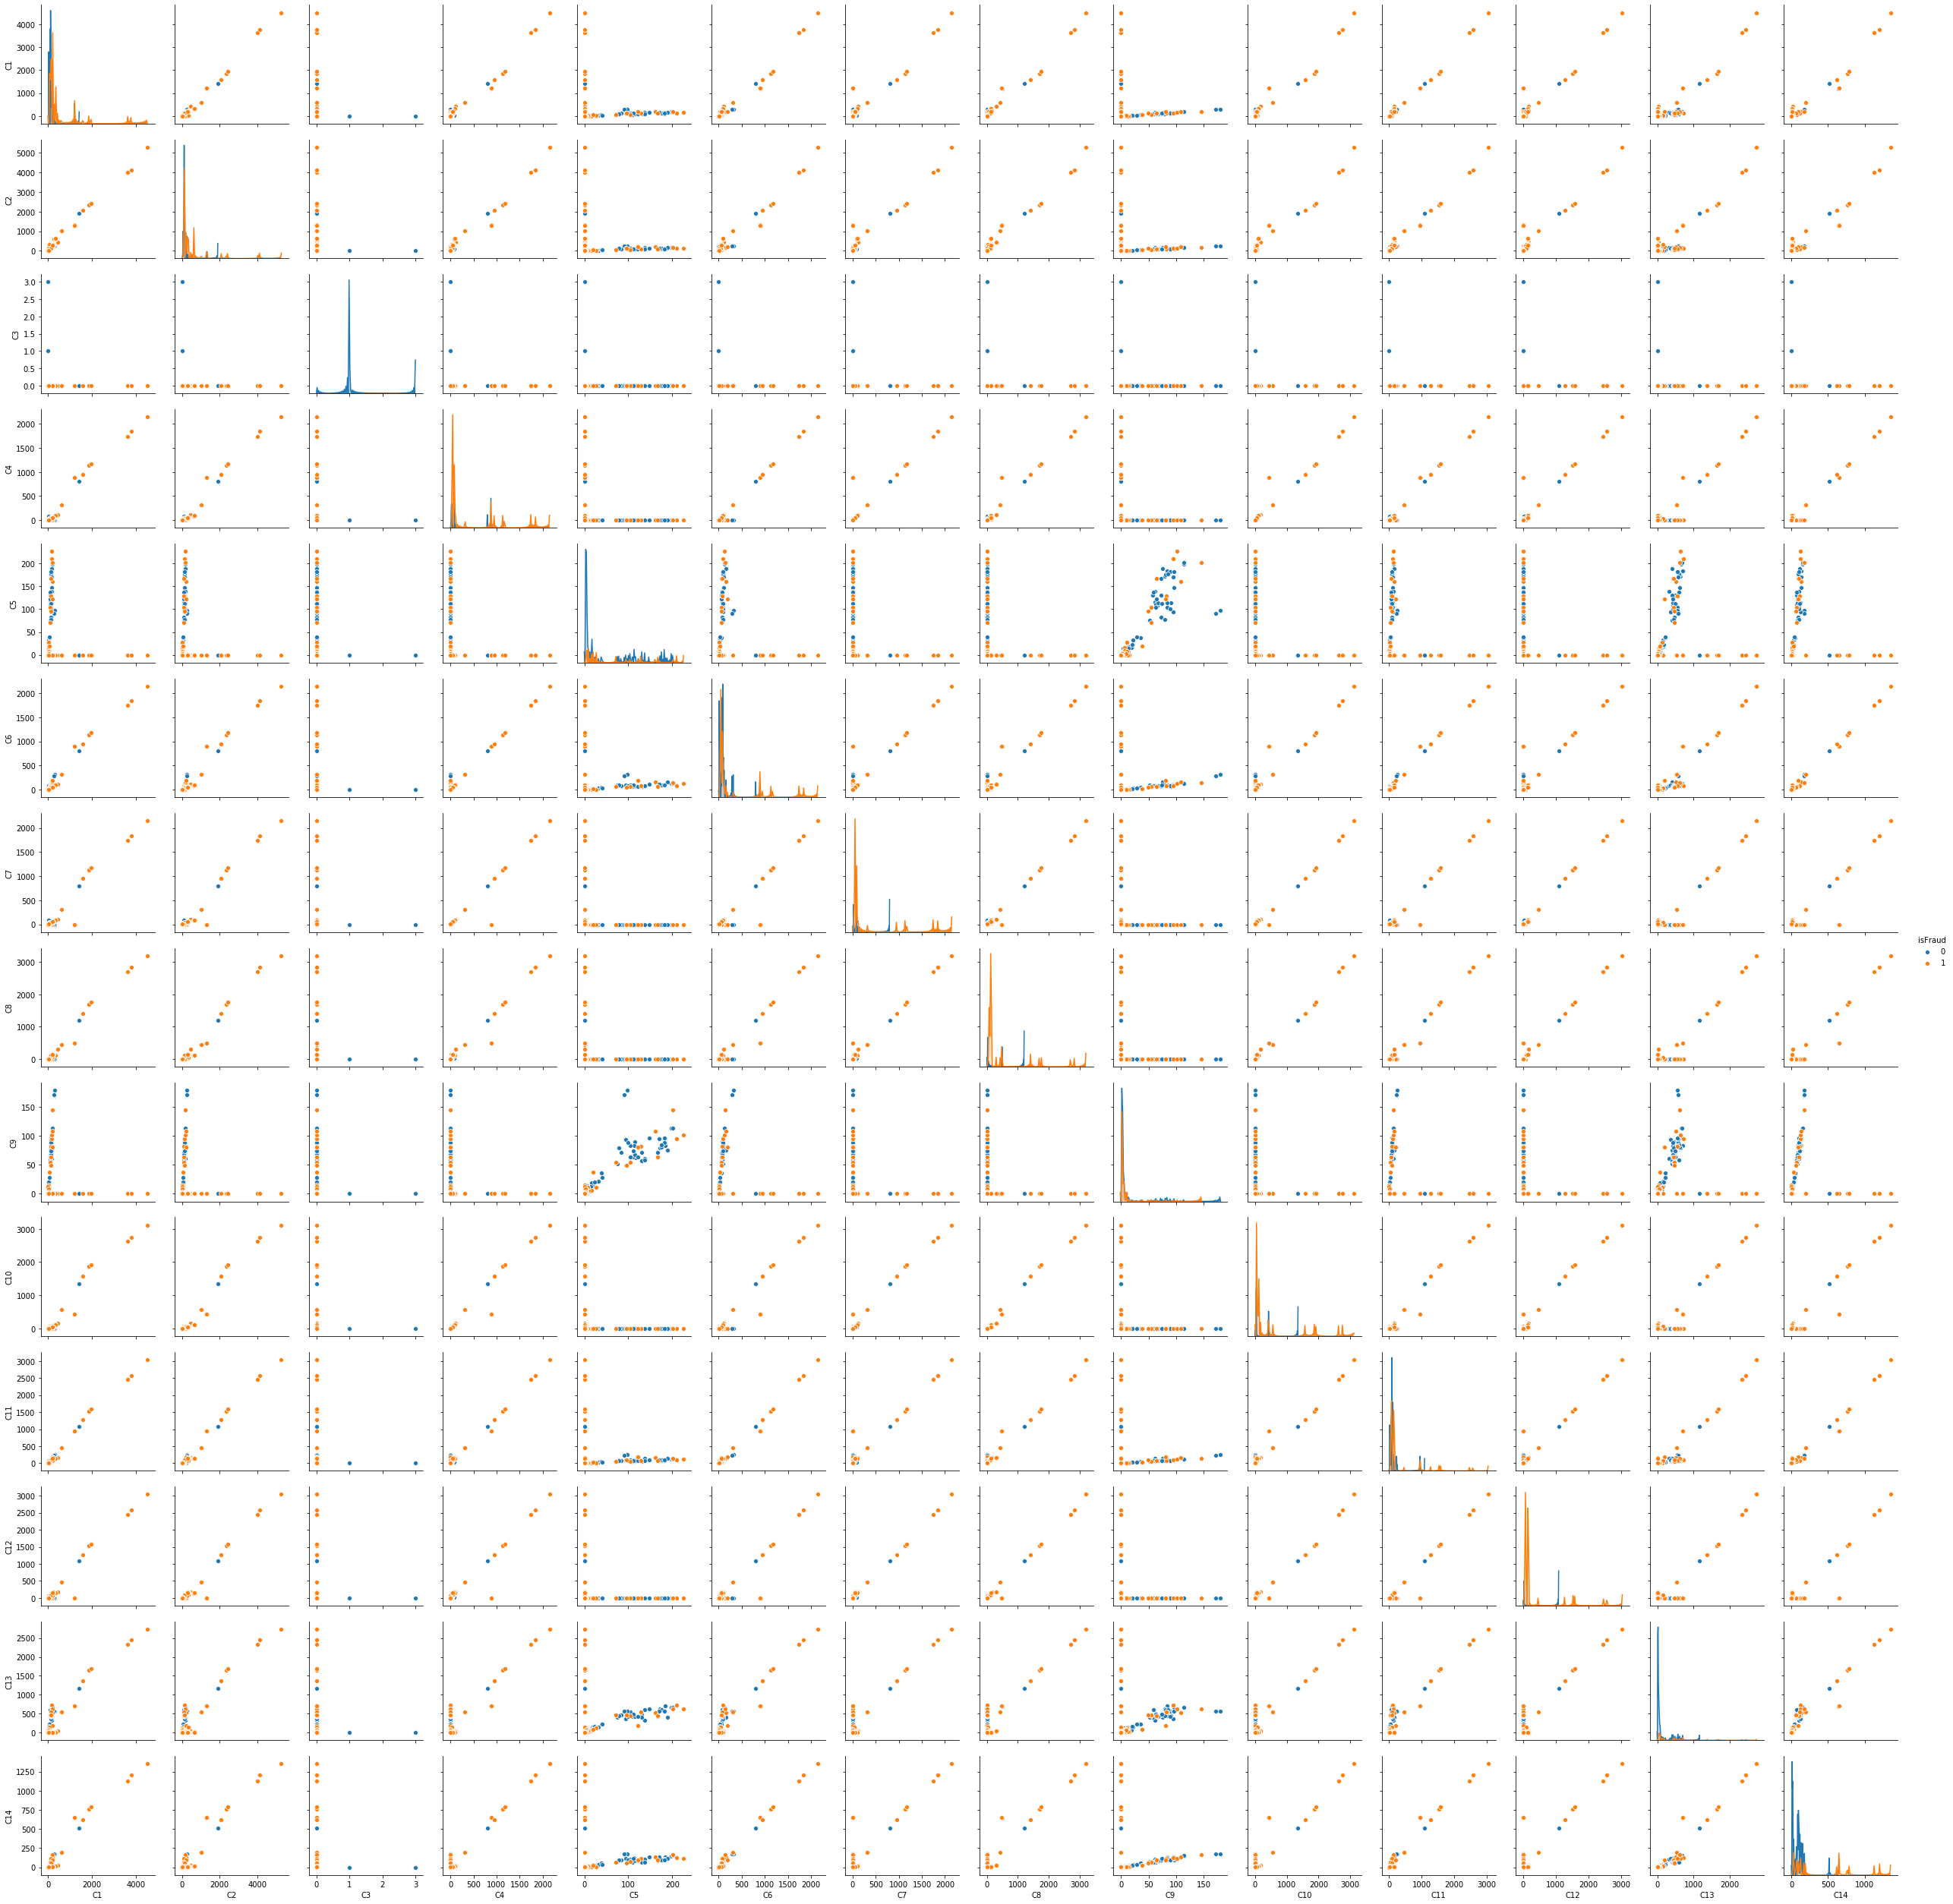

In [82]:
# C columns
c_cols = [c for c in train if c[0] == 'C']
sampled_train = pd.concat([train.loc[train['isFraud'] == 0].sample(1000),
          train.loc[train['isFraud'] == 1].sample(1000)])
sns.pairplot(sampled_train, hue='isFraud',vars=c_cols)
plt.show()

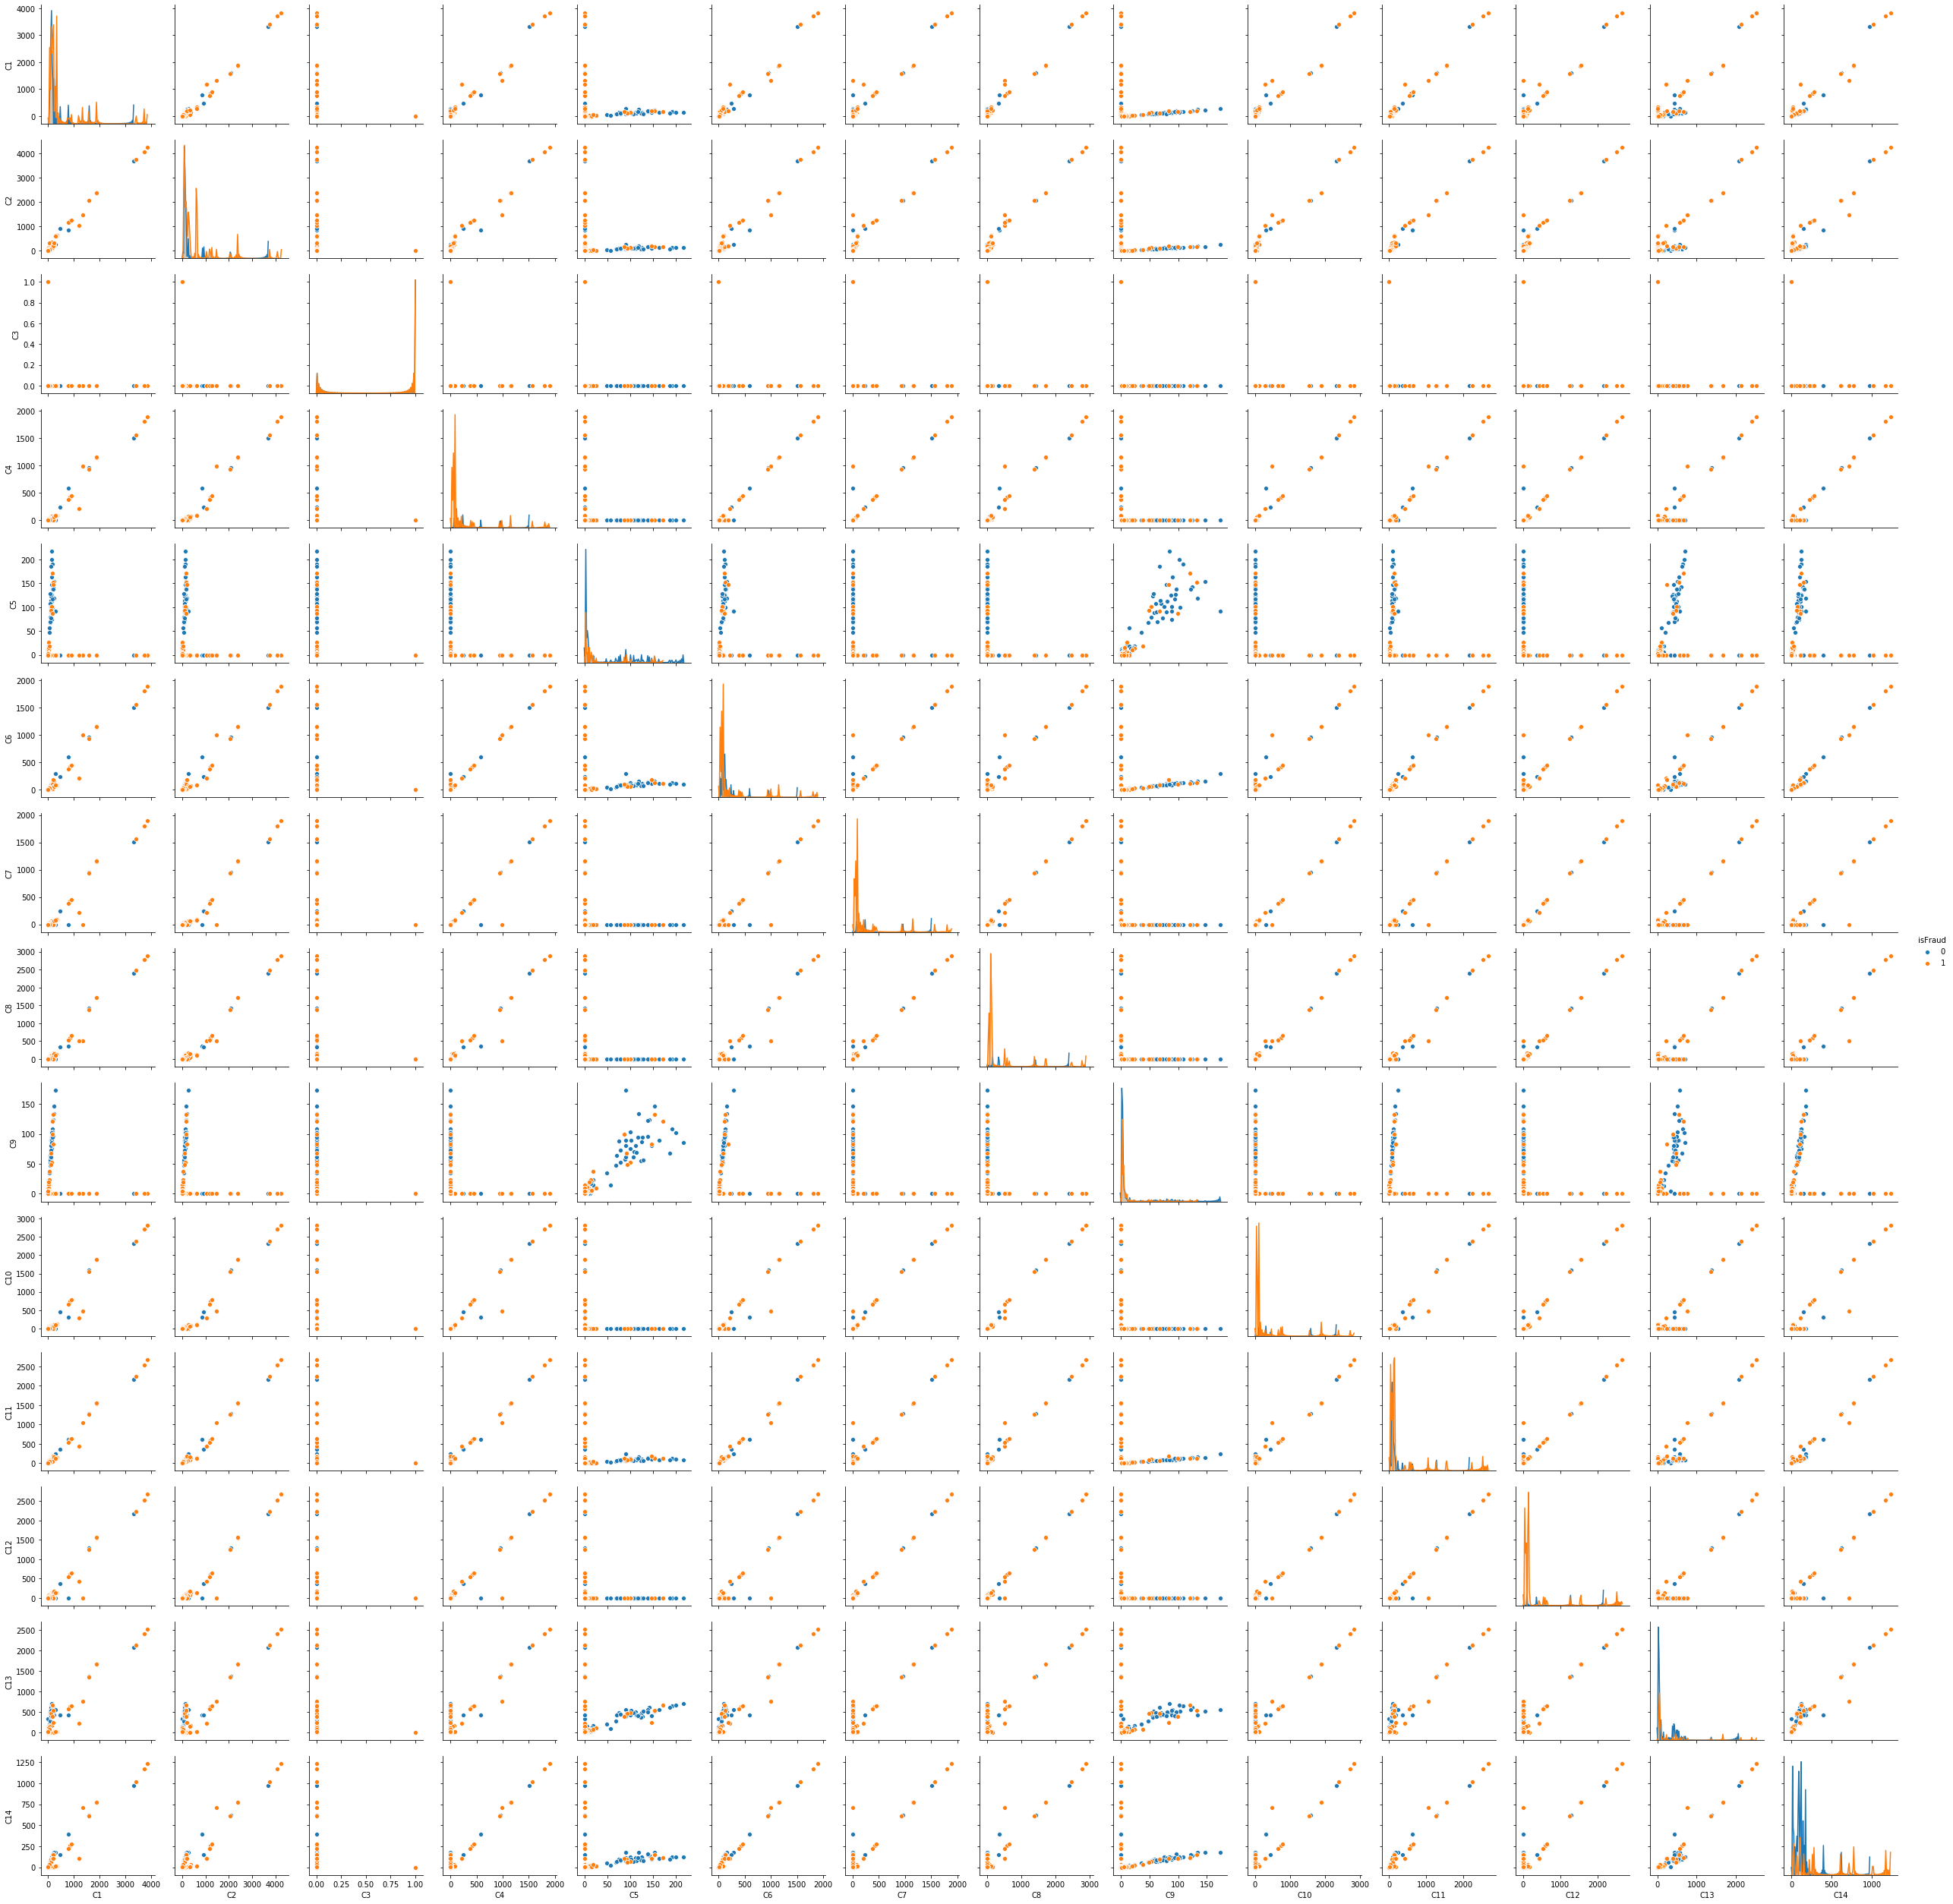

In [83]:
# D columns
d_cols = [c for c in train if c[0] == 'D']
sampled_train = pd.concat([train.loc[train['isFraud'] == 0].sample(1000),
          train.loc[train['isFraud'] == 1].sample(1000)])
sns.pairplot(sampled_train, hue='isFraud',vars=c_cols)
plt.show()

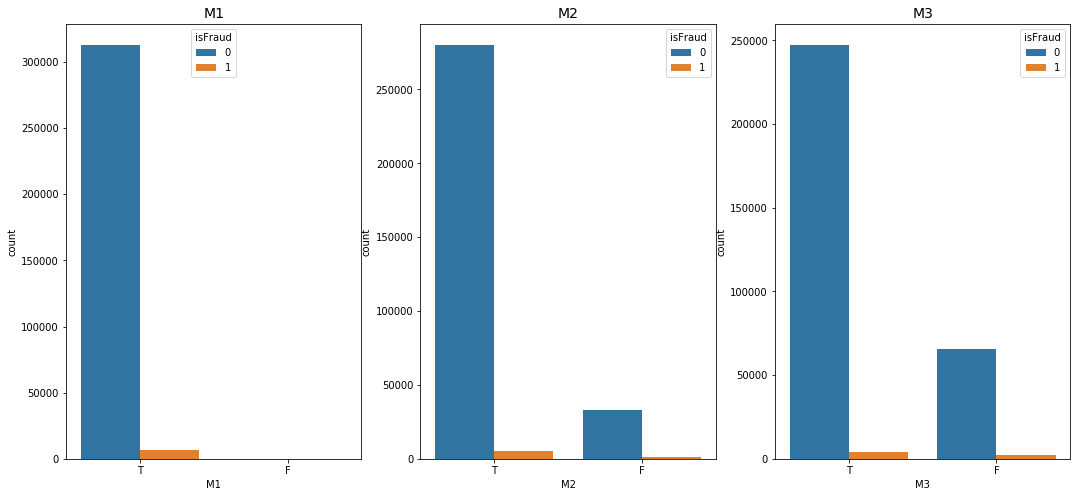

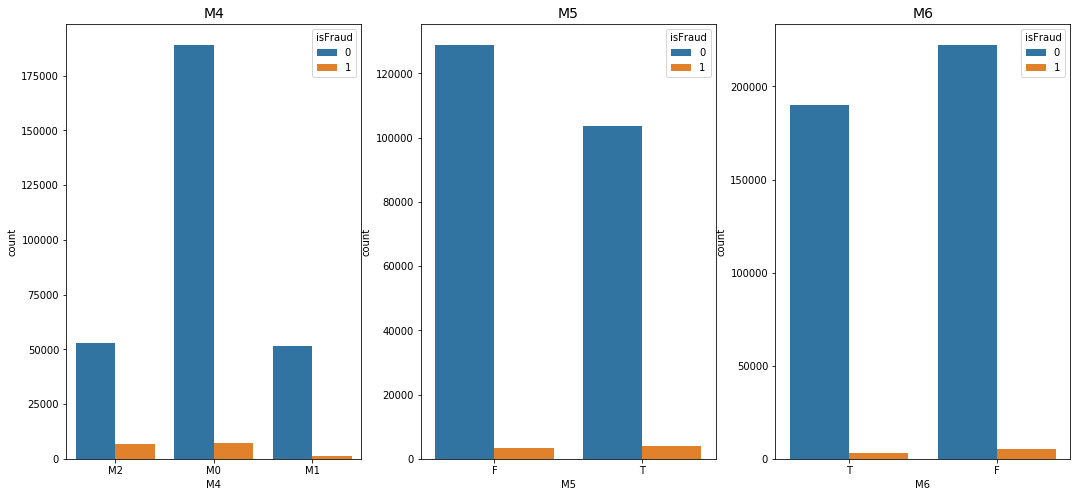

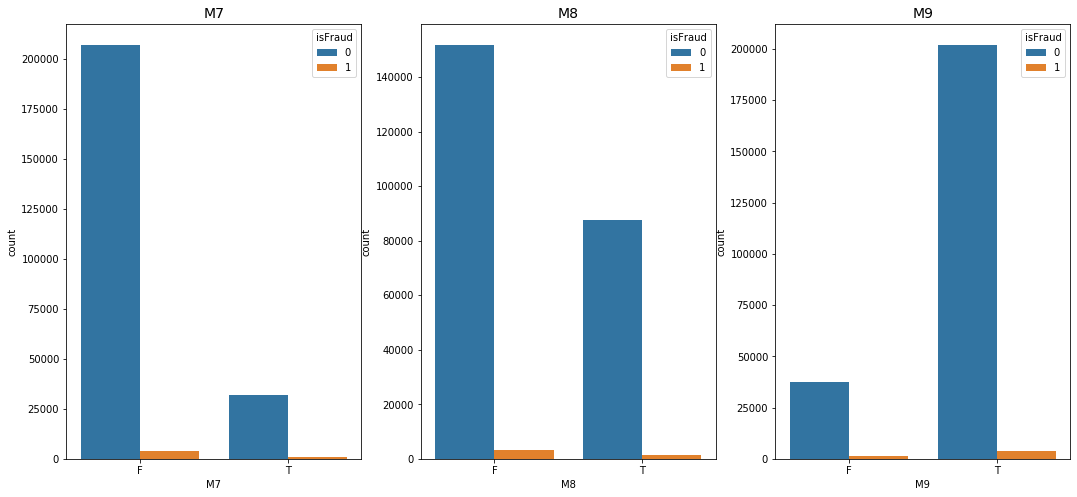

In [126]:
fig,ax=plt.subplots(1,3,figsize=(18,8))
sns.countplot(x="M1", ax=ax[0], hue = "isFraud", data=train)
ax[0].set_title('M1', fontsize=14)
sns.countplot(x="M2", ax=ax[1], hue = "isFraud", data=train)
ax[1].set_title('M2', fontsize=14)
sns.countplot(x="M3", ax=ax[2], hue = "isFraud", data=train)
ax[2].set_title('M3', fontsize=14)
fig,ax=plt.subplots(1,3,figsize=(18,8))
sns.countplot(x="M4", ax=ax[0], hue = "isFraud", data=train)
ax[0].set_title('M4', fontsize=14)
sns.countplot(x="M5", ax=ax[1], hue = "isFraud", data=train)
ax[1].set_title('M5', fontsize=14)
sns.countplot(x="M6", ax=ax[2], hue = "isFraud", data=train)
ax[2].set_title('M6', fontsize=14)
fig,ax=plt.subplots(1,3,figsize=(18,8))
sns.countplot(x="M7", ax=ax[0], hue = "isFraud", data=train)
ax[0].set_title('M7', fontsize=14)
sns.countplot(x="M8", ax=ax[1], hue = "isFraud", data=train)
ax[1].set_title('M8', fontsize=14)
sns.countplot(x="M9", ax=ax[2], hue = "isFraud", data=train)
ax[2].set_title('M9', fontsize=14)
plt.show()

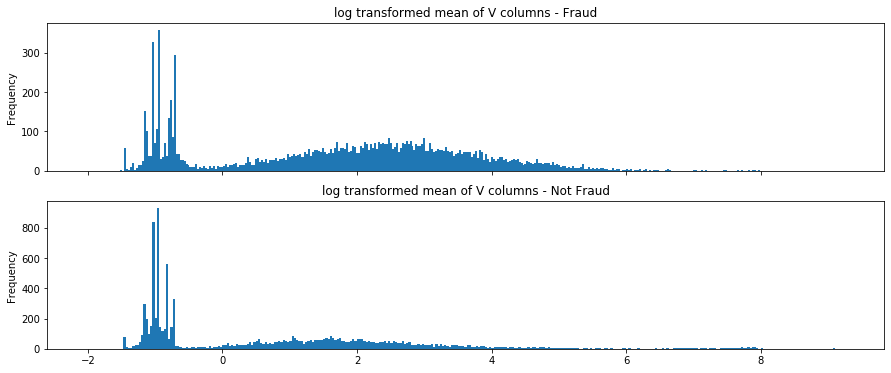

In [128]:
v_cols = [c for c in train if c[0] == 'V']
train['v_mean']=train[v_cols].mean(axis=1)
fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(15, 6))
train.loc[train['isFraud'] == 1]['v_mean'].sample(10000) \
    .apply(np.log) \
    .plot(kind='hist',bins=339,title='log transformed mean of V columns - Fraud',ax=ax1)
train.loc[train['isFraud'] == 0]['v_mean'].sample(10000) \
    .apply(np.log) \
    .plot(kind='hist',bins=339,title='log transformed mean of V columns - Not Fraud',ax=ax2)
plt.show()

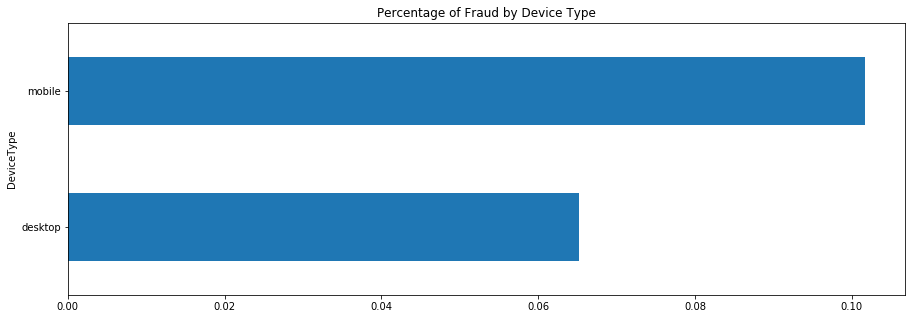

In [84]:
# device type
train.groupby('DeviceType') \
    .mean()['isFraud'] \
    .sort_values() \
    .plot(kind='barh',figsize=(15, 5),title='Percentage of Fraud by Device Type')
plt.show()

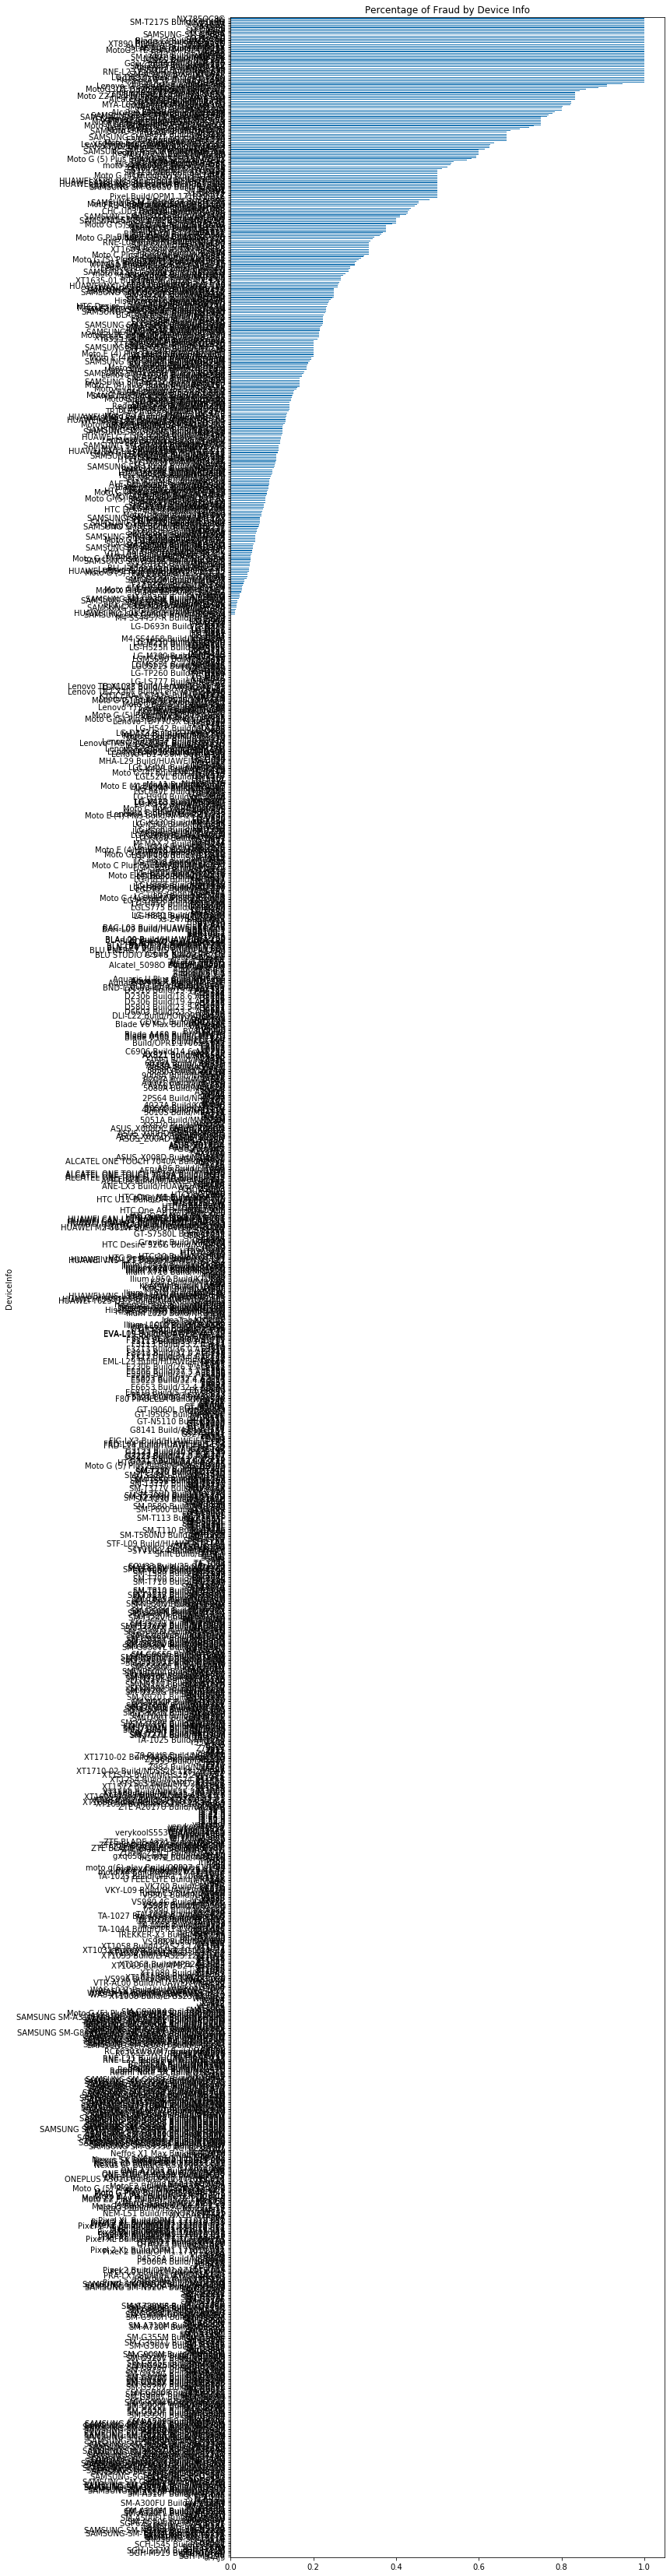

In [114]:
# device info
train.groupby('DeviceInfo') \
    .mean()['isFraud']\
    .sort_values()\
    .plot(kind='barh',figsize=(10,60),title='Percentage of Fraud by Device Info',fontsize=10)
plt.show()

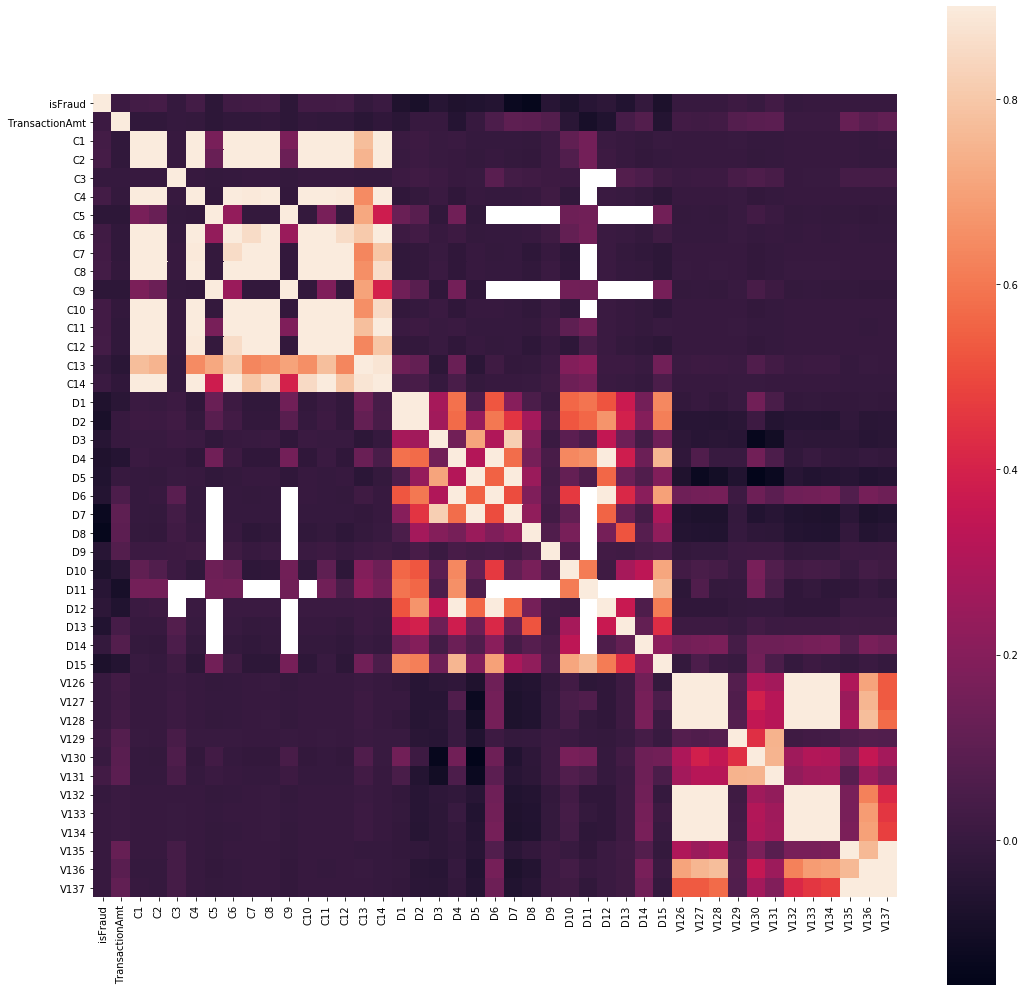

In [11]:
col=['isFraud','TransactionAmt','C1','C2','C3','C4','C5','C6','C7','C8','C9','C10','C11','C12','C13','C14',
     'D1','D2','D3','D4','D5','D6','D7','D8','D9','D10','D11','D12','D13','D14','D15',
    'V126','V127','V128','V129','V130','V131','V132','V133','V134','V135','V136','V137']
data_corr=train[col]
corrmat=data_corr.corr()
plt.subplots(figsize=(18,18))
sns.heatmap(corrmat,vmax=0.9,square=True)